Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the dataset

Displaying the entire dataset


In [3]:
divorce = pd.read_csv('divorce.csv')
print(divorce.head())

  divorce_date     dob_man education_man  income_man   dob_woman  \
0   2006-09-06  1975-12-18     Secondary      2000.0  1983-08-01   
1   2008-01-02  1976-11-17  Professional      6000.0  1977-03-13   
2   2011-01-02  1969-04-06   Preparatory      5000.0  1970-02-16   
3   2011-01-02  1979-11-13     Secondary     12000.0  1981-05-13   
4   2011-01-02  1982-09-20  Professional      6000.0  1988-01-30   

  education_woman  income_woman marriage_date  marriage_duration  num_kids  
0       Secondary        1800.0    2000-06-26                5.0       1.0  
1    Professional        6000.0    2001-09-02                7.0       NaN  
2    Professional        5000.0    2000-02-02                2.0       2.0  
3       Secondary       12000.0    2006-05-13                2.0       NaN  
4    Professional       10000.0    2007-08-06                3.0       NaN  


Validating datasets

In [4]:
missing_values = divorce.isnull().sum()
print("Missing values:")
print(missing_values)

# Check data types
print("Data types:")
print(divorce.dtypes)

# Check for duplicate entries
duplicate_rows = divorce.duplicated().sum()
print("Duplicate entries:")
print(duplicate_rows)

Missing values:
divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64
Data types:
divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object
Duplicate entries:
0


Summarizing the dataset statistics

In [5]:
# Calculate basic statistics for numerical columns
print("Basic statistics:")
print(divorce.describe())

# Count the frequency of education levels for both man and woman
print("Education level frequency for man:")
print(divorce['education_man'].value_counts())
print("Education level frequency for woman:")
print(divorce['education_woman'].value_counts())

# Count the number of unique marriage durations
print("Unique marriage durations:")
print(divorce['marriage_duration'].unique())

Basic statistics:
         income_man  income_woman  marriage_duration     num_kids
count   2209.000000   2209.000000        2209.000000  1333.000000
mean    7922.986410   6793.164545           9.606609     1.672918
std     7693.796497   6562.928689           7.266696     0.732858
min        3.000000      3.500000           1.000000     1.000000
25%     3600.000000   3000.000000           4.000000     1.000000
50%     6000.000000   5000.000000           8.000000     2.000000
75%    10000.000000   8000.000000          14.000000     2.000000
max    80000.000000  90000.000000          32.000000     5.000000
Education level frequency for man:
Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64
Education level frequency for woman:
Professional    1433
Preparatory      456
Secondary        253
Primary           65
Other              2
Name: education_woman, dtype: int64
Unique marriage

Calculating correlation matrix

<ipython-input-6-edc0fe6b008f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = divorce.corr()


Correlation matrix:
                   income_man  income_woman  marriage_duration  num_kids
income_man           1.000000      0.318047           0.085321  0.040848
income_woman         0.318047      1.000000           0.078677 -0.018015
marriage_duration    0.085321      0.078677           1.000000  0.447358
num_kids             0.040848     -0.018015           0.447358  1.000000


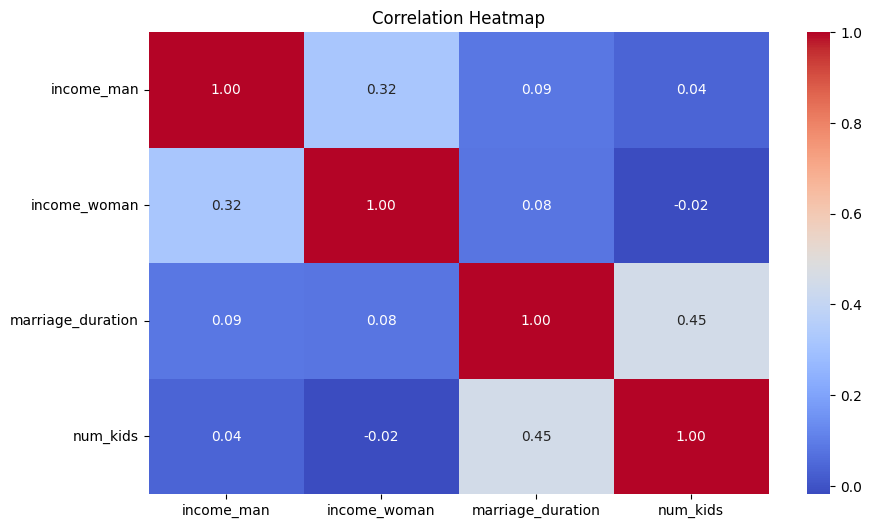

In [6]:
# Calculate correlation coefficients
correlation_matrix = divorce.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Splitting the dataset into Train and Test sets

In [7]:
# Assuming 'num_kids' is the target variable
X = divorce.drop(columns=['divorce_date', 'marriage_date', 'num_kids'])  # Assuming 'divorce_date' and 'marriage_date' are not used as features
y = divorce['num_kids']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1767, 7)
Testing set shape: (442, 7)
